# Instalação e Importe de Bibliotecas

In [1]:
!pip install scikit-learn

In [2]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.3 MB/s eta 0:00:00


In [3]:
import streamlit as st
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import os

# Confirguração da página Streamlit e Importe | Treinamento do modelo

**Essas deverão ser as primeiras linhas do código:**

**st.set_page_config(...):** Esta linha configura as opções da página do aplicativo Streamlit.

**page_title="Análise Obesidade | Dashboard":** Define o título da aba do navegador para "Análise Obesidade | Dashboard".

**layout="wide":** Configura o layout da página para ser mais largo, aproveitando melhor o espaço da tela.

In [4]:
st.set_page_config(
    page_title="Análise Obesidade | Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

2025-08-27 19:13:18.106 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


# Explorando os dados

#### Vamos inicar a exploração dos dados não apenas com a chamada da base utilizando o pandas, mas também realizando uma plotagem entre pares de forma geral e, depois, isolando alguns pares para fins de analiar as relações.

#### Esse tipo de plotagem vai integrar nosso painel do Streamlit também de forma interativa com o usuário que poderá realizar análises sobre os diversos pares de feactures.

In [5]:
dados = pd.read_csv(r"/content/Obesity.csv")
dados.head(100)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,26.0,1.70,70.0,yes,no,3.0,1.0,Frequently,no,2.0,no,2.0,0.0,Frequently,Public_Transportation,Normal_Weight
96,Female,23.0,1.66,60.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight


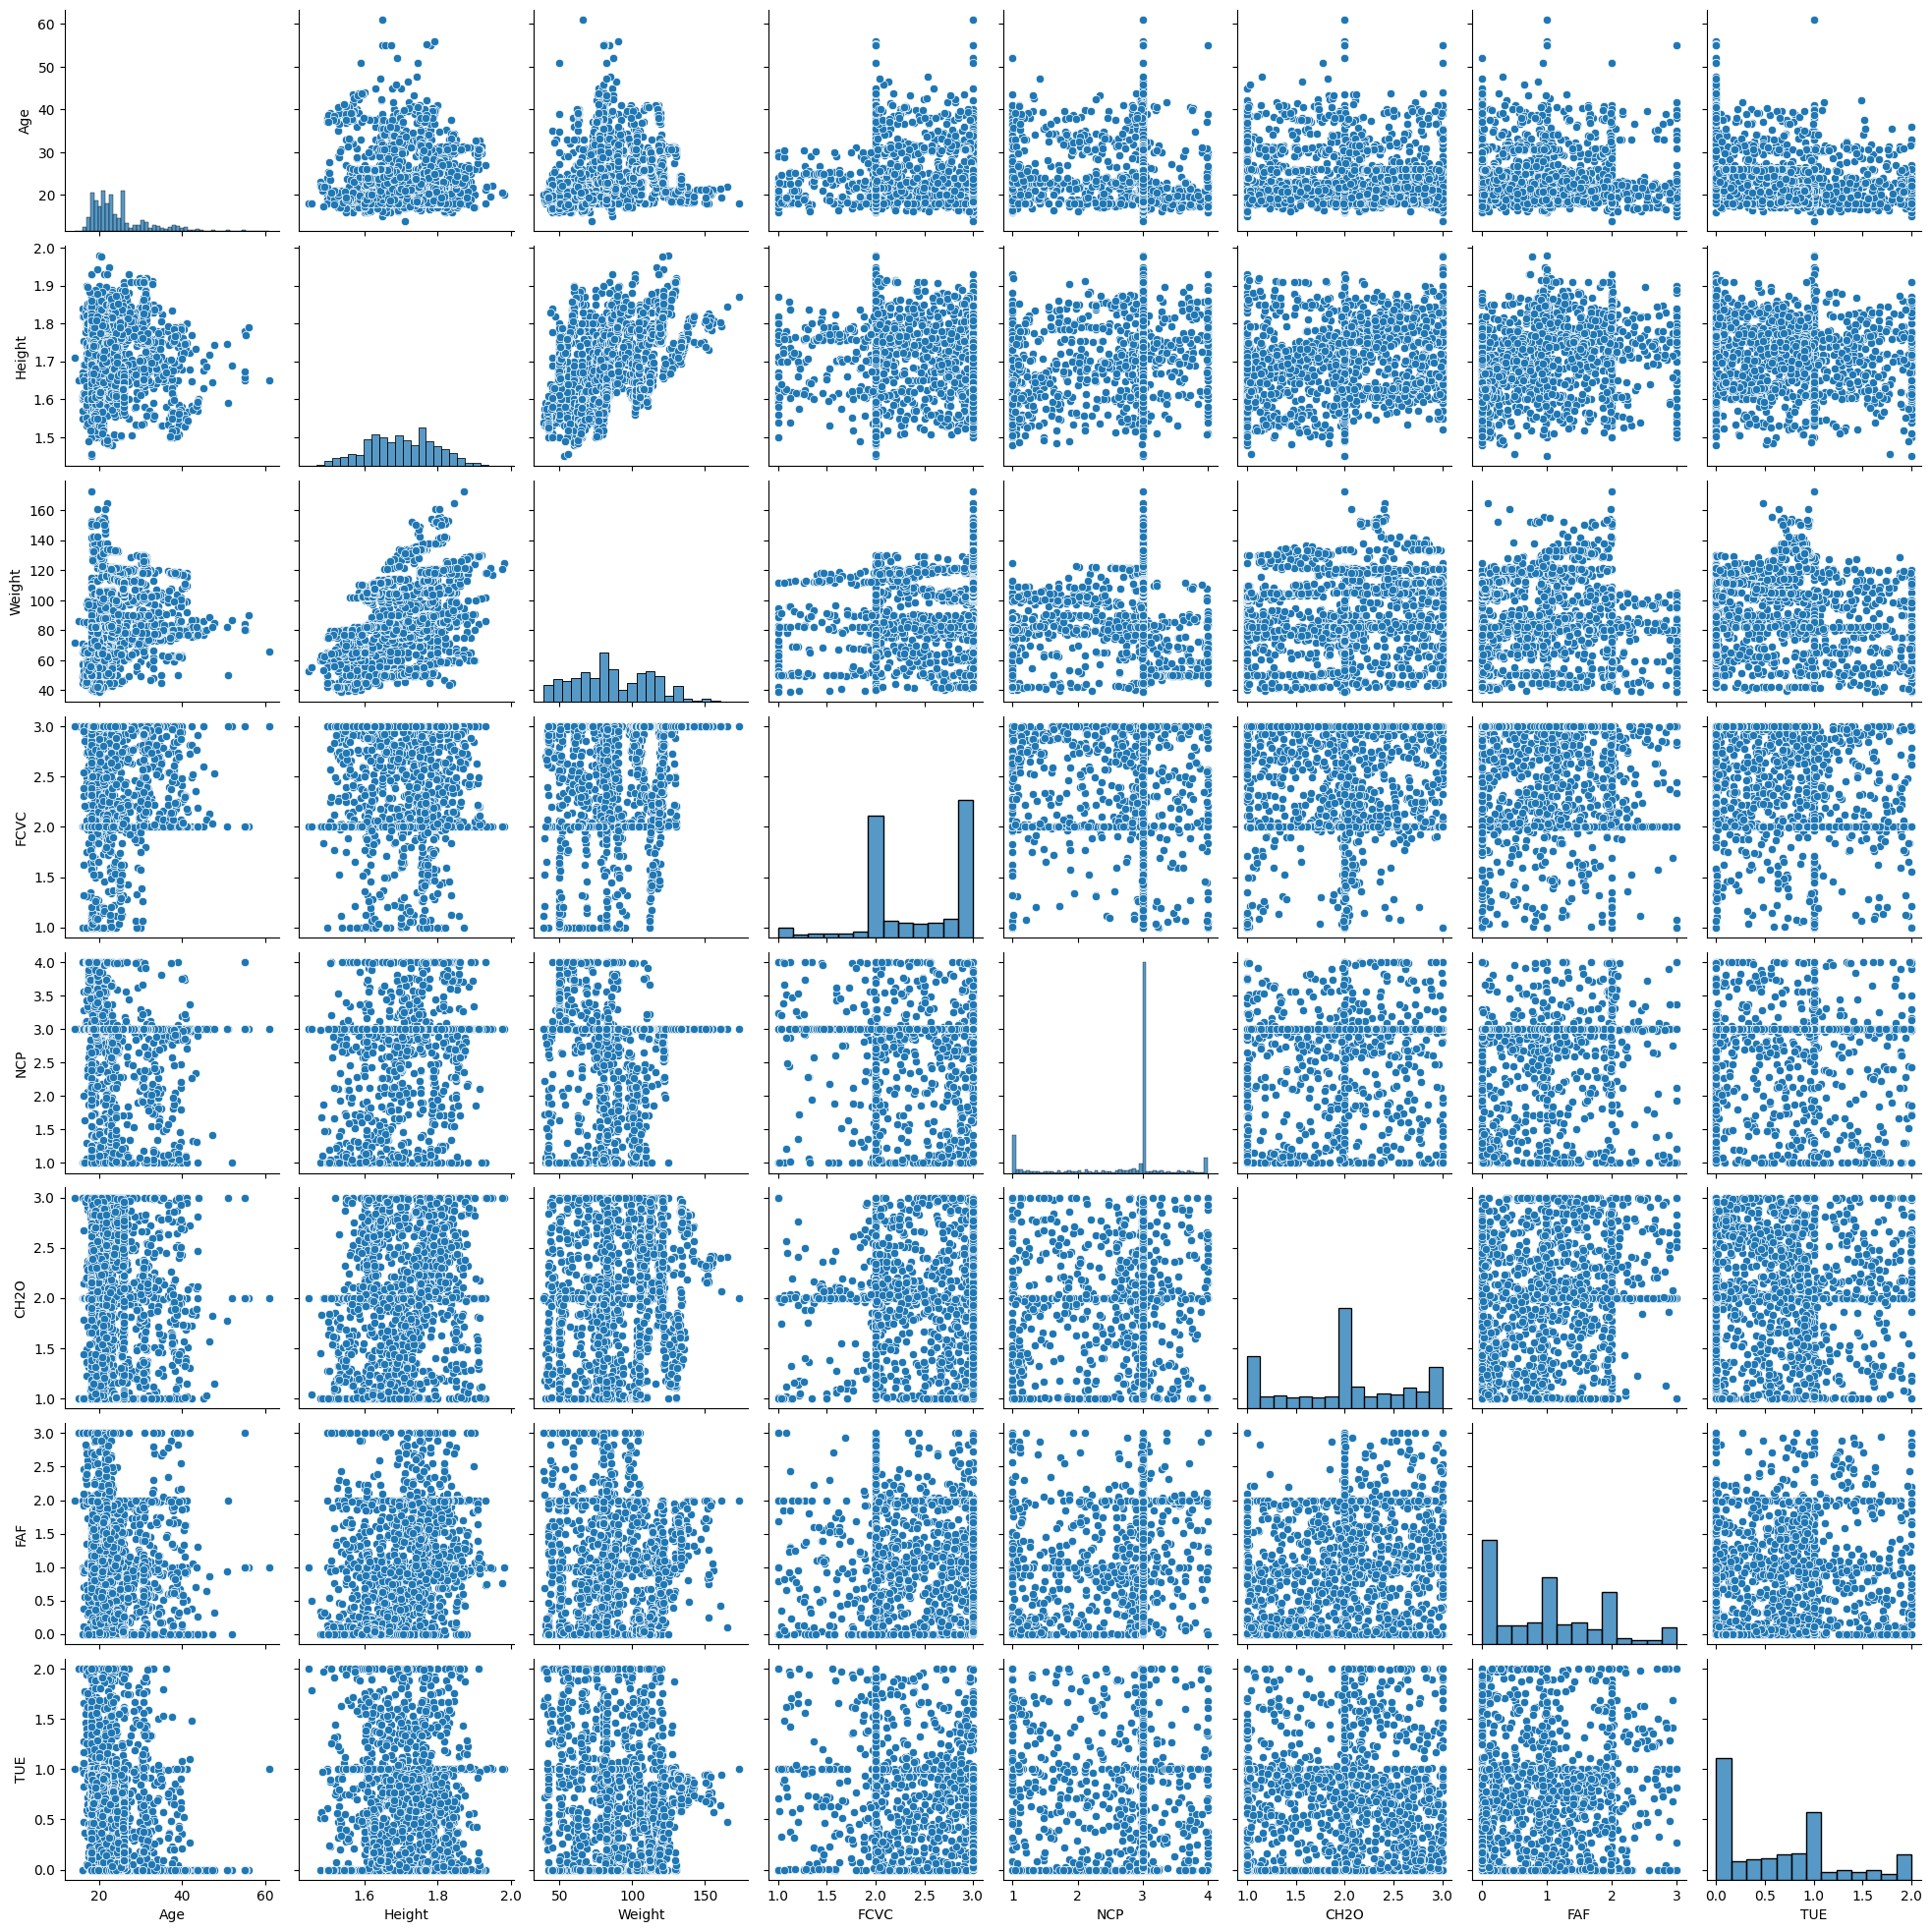

In [6]:
sns.pairplot(dados)

In [7]:
dados.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

Em classificação binária, essas métricas são diretas. Por exemplo, a Sensibilidade (Recall) é a taxa de verdadeiros positivos, e a Especificidade é a taxa de verdadeiros negativos.

No entanto, em um cenário multiclasse, temos mais de duas classes (neste caso, diferentes níveis de obesidade). Para avaliar o desempenho do modelo em todas as classes, as métricas são frequentemente calculadas para cada classe individualmente e depois combinadas usando diferentes métodos de média.

No código que forneci, usei a média weighted (ponderada) para Precisão, Sensibilidade (Recall) e F1-score.

In [9]:
X = dados.drop('Obesity', axis=1)
y = dados['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
display(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Precision (weighted): {precision}")

sensitivity = recall_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Sensitivity (Recall) (weighted): {sensitivity}")

def specificity_score(y_true, y_pred, labels=None, average='weighted'):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    specificity_per_class = []
    for i in range(cm.shape[0]):
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity_per_class.append(tn / (tn + fp) if (tn + fp) > 0 else 0)

    if average == 'weighted':

        y_true_array = y_true.to_numpy() if hasattr(y_true, 'to_numpy') else y_true
        class_counts = np.bincount(y_true_array) if labels is None else np.bincount([list(labels).index(x) for x in y_true_array], minlength=len(labels))
        return np.average(specificity_per_class, weights=class_counts)
    else:
         return np.mean(specificity_per_class)

specificity = specificity_score(y_test, y_pred, labels=model.classes_, average='weighted')
print(f"Specificity (weighted): {specificity}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score (weighted): {f1}")

array([[54,  2,  0,  0,  0,  0,  0],
       [ 2, 54,  0,  0,  0,  5,  1],
       [ 0,  3, 71,  2,  0,  0,  2],
       [ 0,  0,  1, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  7,  0,  0,  0, 48,  1],
       [ 0,  0,  0,  0,  0,  3, 47]])

Accuracy: 0.9314420803782506
Precision (weighted): 0.9332299505238136
Sensitivity (Recall) (weighted): 0.9314420803782506
Specificity (weighted): 0.9889671026193183
F1-score (weighted): 0.9319148320996857
